## 2. Exploratory Data Analysis (EDA) - Identifying "Hotspots"


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

df = pd.read_csv('../data/banking_losses_for_tableau.csv')
print("Cleaned data loaded.")
df.head()

Cleaned data loaded.


,State,Loss_2018_19,Loss_2019_20,YoY_Change_2019_20,Loss_2020_21,YoY_Change_2020_21,Loss_2021_22,YoY_Change_2021_22,Loss_2022_23,YoY_Change_2022_23,Loss_2023_24,YoY_Change_2023_24,Loss_2024_25,YoY_Change_2024_25,Cumulative_Loss,Volatility,CAGR
0,Andaman and Nicobar Islands,0.11,0.07,-36.363636,0.00,-100.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.18,40.554015,-100.000000
1,Andhra Pradesh,0.15,1.30,766.666667,0.72,-44.615385,0.29,-59.722222,3.30,1037.931034,1.76,-46.666667,0.77,-56.250000,8.29,500.145323,31.340877
2,Arunachal Pradesh,0.01,0.05,400.000000,0.38,660.000000,0.00,-100.000000,0.00,0.000000,0.00,0.000000,0.01,inf,0.45,NaN,0.000000
3,Assam,0.81,2.39,195.061728,1.68,-29.707113,1.04,-38.095238,0.25,-75.961538,0.74,196.000000,0.06,-91.891892,6.97,133.407604,-35.194623
4,Bihar,0.34,0.63,85.294118,1.09,73.015873,2.08,90.825688,1.20,-42.307692,0.39,-67.500000,0.42,7.692308,6.15,68.787467,3.584569


### 2.2. Feature Engineering for Hotspot Analysis

In [6]:
loss_cols = [col for col in df.columns if 'Loss_' in col]
df['Cumulative_Loss'] = df[loss_cols].sum(axis=1)

yoy_cols = [col for col in df.columns if 'YoY_Change_' in col]
df['Volatility'] = df[yoy_cols].std(axis=1)

num_periods = 6
start_value = df['Loss_2018_19']
end_value = df['Loss_2024_25']
df['CAGR'] = np.where(
    start_value > 0,
    (np.power(end_value / start_value, 1/num_periods) - 1) * 100,
    np.nan
)

c:\Users\KRISTINE\projects\banking_loss_analysis\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


### 2.3. Top Risk Contributors by Cumulative Loss

C:\Users\KRISTINE\AppData\Local\Temp\ipykernel_30560\878909514.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


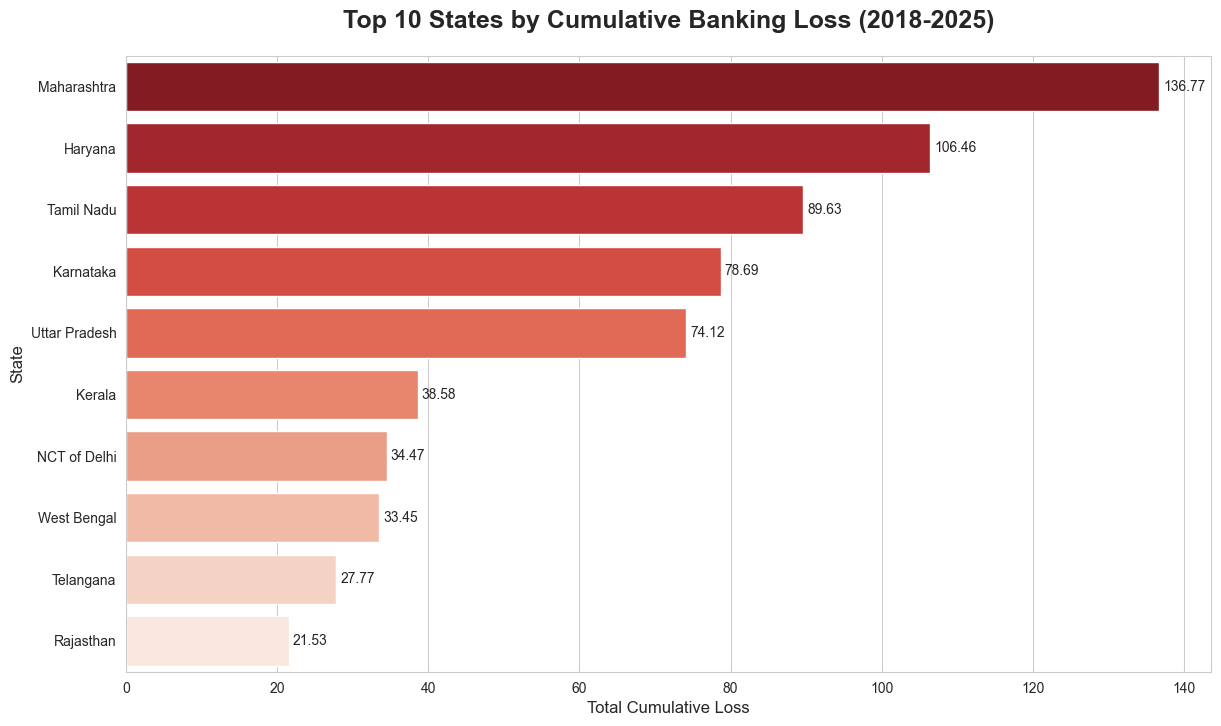

In [7]:

sns.set_style("whitegrid")
df_states_only = df[df['State'] != 'Total']
top_10_hotspots = df_states_only.sort_values(by='Cumulative_Loss', ascending=False).head(10)

plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    y='State',
    x='Cumulative_Loss',
    data=top_10_hotspots,
    palette='Reds_r'
)
plt.title('Top 10 States by Cumulative Banking Loss (2018-2025)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Total Cumulative Loss', fontsize=12)
plt.ylabel('State', fontsize=12)
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f', padding=3)
plt.show()

### 2.4. Risk Profile of Hotspots (Loss vs. Volatility)

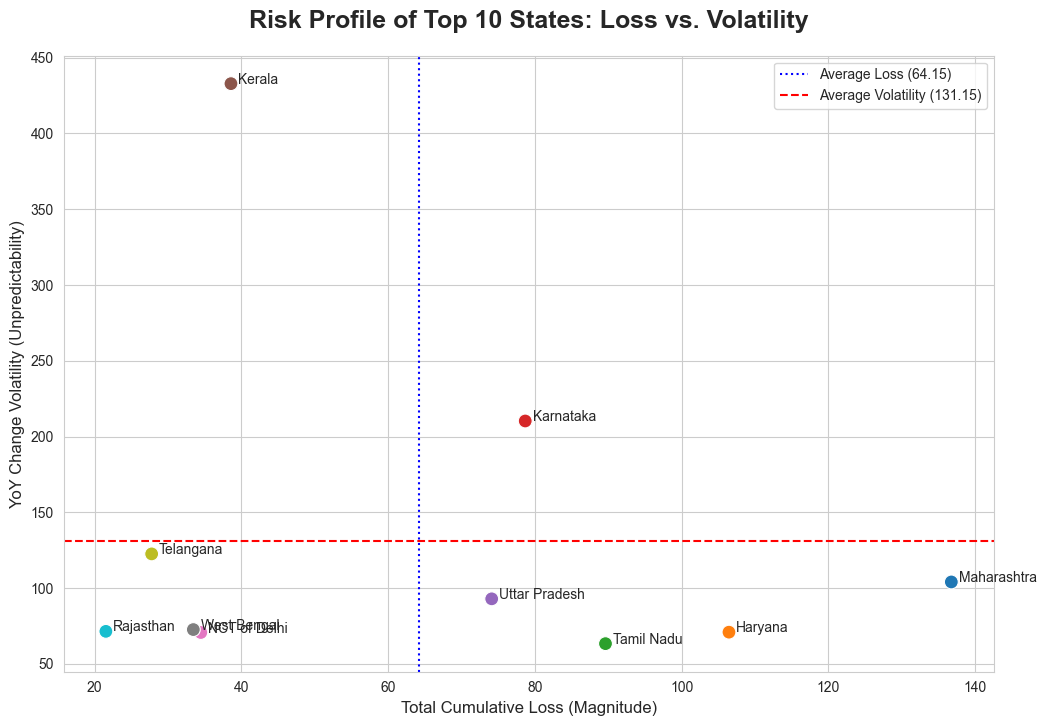

In [8]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Cumulative_Loss',
    y='Volatility',
    data=top_10_hotspots,
    s=100,
    hue='State',
    legend=False
)
for i, row in top_10_hotspots.iterrows():
    plt.text(row['Cumulative_Loss'] + 1, row['Volatility'], row['State'])

avg_loss = top_10_hotspots['Cumulative_Loss'].mean()
avg_volatility = top_10_hotspots['Volatility'].mean()
plt.axvline(x=avg_loss, color='blue', linestyle=':', label=f'Average Loss ({avg_loss:.2f})')
plt.axhline(y=avg_volatility, color='red', linestyle='--', label=f'Average Volatility ({avg_volatility:.2f})')

plt.title('Risk Profile of Top 10 States: Loss vs. Volatility', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Total Cumulative Loss (Magnitude)', fontsize=12)
plt.ylabel('YoY Change Volatility (Unpredictability)', fontsize=12)
plt.legend()
plt.show()

### 2.5. Emerging Threats by Growth Rate (CAGR)

C:\Users\KRISTINE\AppData\Local\Temp\ipykernel_30560\3504849973.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


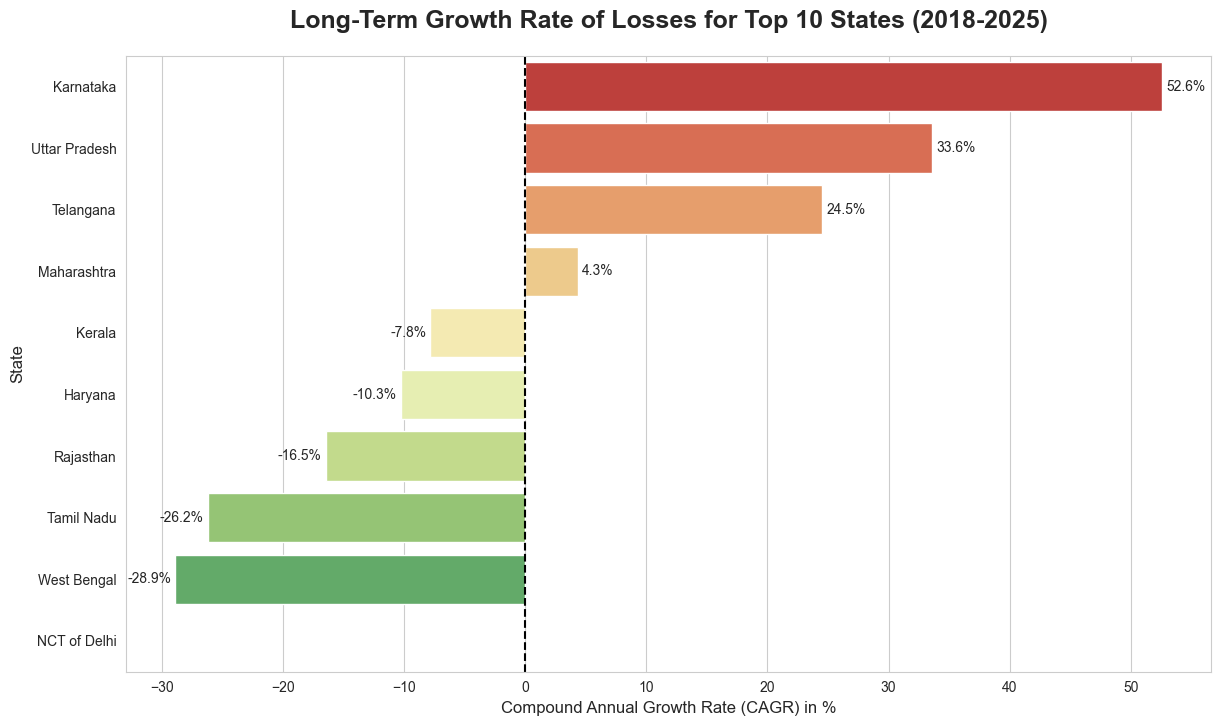

In [9]:

top_10_cagr = top_10_hotspots.sort_values(by='CAGR', ascending=False)

plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    y='State',
    x='CAGR',
    data=top_10_cagr,
    palette='RdYlGn'
)
plt.title('Long-Term Growth Rate of Losses for Top 10 States (2018-2025)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Compound Annual Growth Rate (CAGR) in %', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--')
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.1f%%', padding=3)
plt.show()